<div class="titulo-capitulo" style="background-color: darkblue; color: white;">
    <br>
    <h1 class="centrado">Clase Laboratorio Nº2</h1> 
    <br>
<div style="text-align: left">Autor      : Fiorella Roco Parra&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align: left">Asignatura : Optimización&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align: left">Fecha      : 25.03.2024&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align: left">Correo     : froco.parra@gmail.com&nbsp;&nbsp;&nbsp;&nbsp;</div>
</div>

In [4]:
# Importando librerias
import numpy as np
import matplotlib.pyplot as plt
import math

<div class="titulo-capitulo" style="background-color: darkblue; color: white;">
    <br>
    <h1 class="centrado">I. Fuerza bruta</h1> 
    <br>
</div>

# Ejemplo II:
La Empresa Minera American Minerals Ltda está explorando un nuevo yacimiento en una región rica en recursos minerales, tales como cobre, oro y plata. La empresa desea determinar la cantidad óptima de mineral a extraer por día para maximizar sus ganancias. La empresa por medio de estudios descubrió que los ingresos diarios (en miles de dólares) obtenidos por la venta de mineral en función de la cantidad diaria extraída.


$𝑓(𝑥)= −12𝑥(𝑥−20)^{3}$

Donde, ${𝑥}$ representa la cantidad de mineral extraído por día, medida en toneladas.
Determinar el valor optimo por medio de Fuerza Bruta en Excel y Python.




In [5]:
def function(x):
    return -12*x*(x-20)**3

start = 0 # Define el Incio el intervalo
stop = 20 # Define el Final del intervalo
num = 100 # Define la Cantidad de numeros a generar

x = np.linspace(start,stop,num) #Genera array de numeros donde 
y = function(x)

value = -np.inf # valor inicial --> Nota: representa a un valor infinito. Generalmete es utilizado para realizar comparaciones..
for a1 in x:
    val_fun = function(a1)
    if val_fun > value:
        value = val_fun
        parameters = [round(a1), round(value)] # valor de x, valor f(x) 
print("Solution =", parameters)

Solution = [5, 202486]


Text(0.5, 1.0, 'Función de ingresos diarios y punto óptimo de maximización')

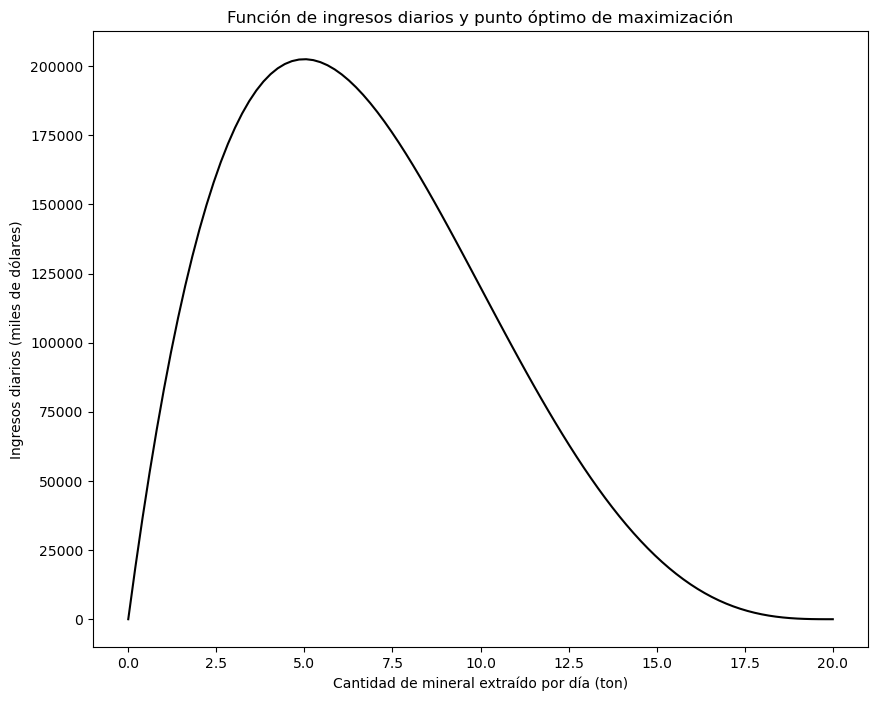

In [6]:
plt.figure(figsize=(10,8))
plt.plot(x,y, color = "black", label='$𝑓(𝑥)= −12𝑥(𝑥−20)^{3}$')

plt.xlabel('Cantidad de mineral extraído por día (ton)')
plt.ylabel('Ingresos diarios (miles de dólares)')
plt.title('Función de ingresos diarios y punto óptimo de maximización')


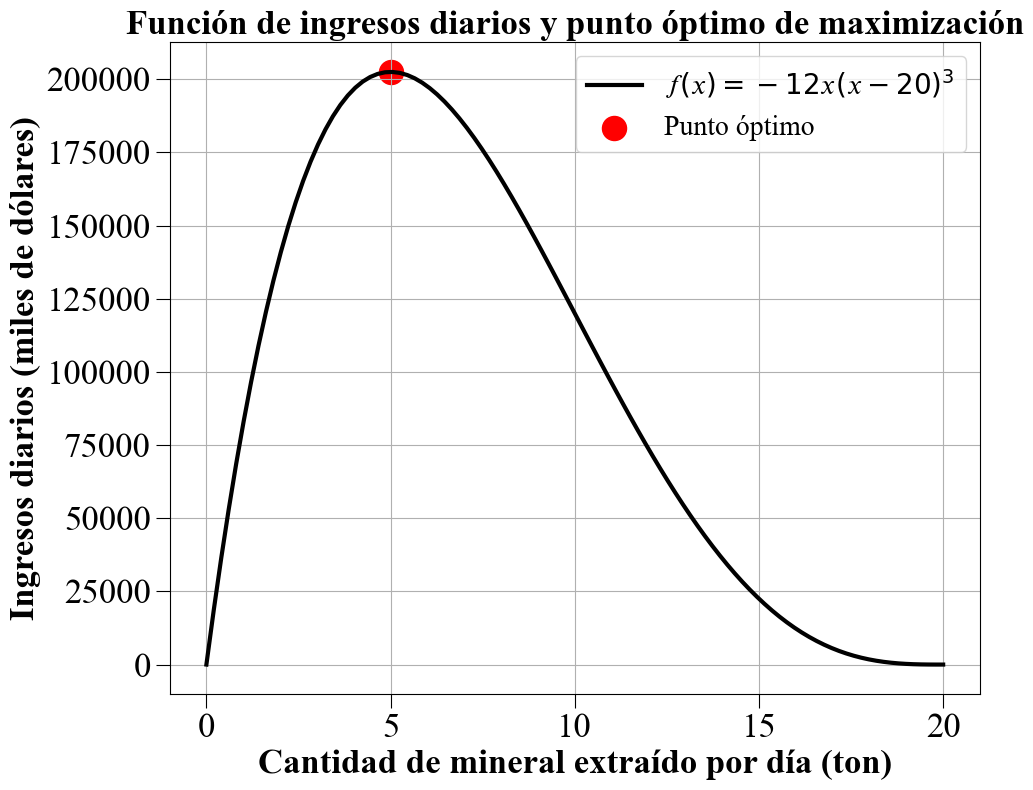

In [7]:
plt.figure(figsize=(10,8))
plt.rcParams['font.family'] = 'Times New Roman'

plt.plot(x,y, color = "black", label='$𝑓(𝑥)= −12𝑥(𝑥−20)^{3}$', linewidth=3)
plt.scatter(parameters[0],parameters[1], s=300, color = "red", label = "Punto óptimo")

plt.xlabel('Cantidad de mineral extraído por día (ton)',  fontsize=25, fontweight="bold")
plt.ylabel('Ingresos diarios (miles de dólares)',  fontsize=25, fontweight="bold")
plt.title('Función de ingresos diarios y punto óptimo de maximización',  fontsize=25, fontweight="bold")

plt.legend(fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=25, length = 10, color = "black") # Modificamos el tamaño de los ejes
plt.tight_layout()  # ajusta el tamaño del gráfico
plt.show()

<div class="titulo-capitulo" style="background-color: darkblue; color: white;">
    <br>
    <h1 class="centrado">II. Programación Lineal</h1> 
    <br>
</div>

# Ejemplo I

Un agricultor tiene 600 hectáreas en las que puede sembrar maíz o cebada y dispone de 800 horas de trabajo durante la temporada. Los márgenes de utilidad por hectárea para el maíz son de 60€ y para la cebada es de 70€. Los requerimientos laborales para trabajar en la siembra de maíz es de 1 hora por hectárea y en la siembra de cebada es de 2 horas por hectárea. ¿Cuántas hectáreas de cada cultivo debe sembrar para maximizar su utilidad?, ¿Cuál es la utilidad máxima?


In [8]:
# Definición de restricciones y calculo de interseccion de curvas 

#Restricciones
def Restriccion1(x):  #Hectareas
    return 600 - x

def Restriccion2(x):  #Horas
    return (800 - x) / 2

# Utilizamos linspace para definir el rango de valores a evaluar en x
valores_x = np.linspace(0, 1000, 100)  #linspace(inicio, fin, n) --> Crea y devuelve una arreglo de una dimensión donde sus elementos 
#                                      son la secuencia de n valores equidistantes desde inicio hasta fin.

# Calculamos la interseccion de las curvas, anotando nustros datos como sistema de ecuaciones
A = np.array([[1, 1], [1, 2]])
B = np.array([600, 800])
interseccion = np.linalg.solve(A, B) #np.linalg.solve: función de numpy que resuelve un sistema de ecuaciones lineales
interseccion =list(interseccion)


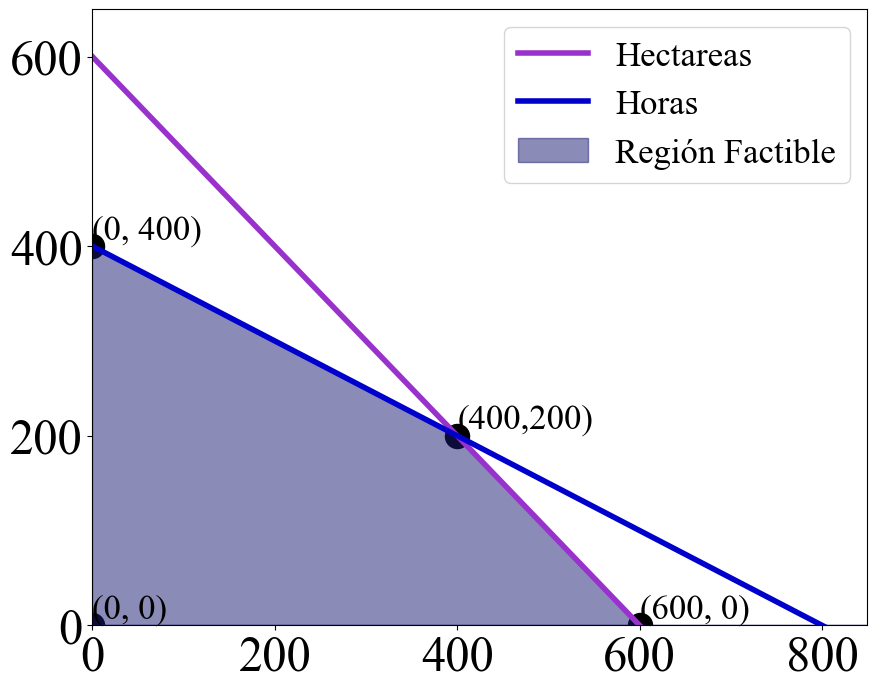

In [9]:
#Graficamos curvas
fig = plt.figure(figsize=(10,8)) # Definimos tamaño del grafico
plt.rcParams['font.family'] = 'Times New Roman' # Definimos el tipo de letra
plt.tick_params(axis='both', which='major', labelsize=35) #Definimos el tamaño de los ejes

plt.plot(valores_x, Restriccion1(valores_x), label="Hectareas", color = "darkorchid", linewidth = 4)
plt.plot(valores_x, Restriccion2(valores_x), label="Horas", color = "mediumblue",linewidth = 4)

#Graficamos puntos criticos
plt.scatter(interseccion[0],interseccion[1], s = 300, color ="black")
plt.scatter(600,0, s = 300, color ="black")
plt.scatter(0,400, s = 300, color ="black")
plt.scatter(0,0, s = 300, color ="black")

#Escribimos los puntos criticos
plt.text(0, 0, '(0, 0)', fontsize=25, ha='left', va='bottom')
plt.text(600, 0, '(600, 0)', fontsize=25, ha='left', va='bottom')
plt.text(0, 400, '(0, 400)', fontsize=25, ha='left', va='bottom')
plt.text(interseccion[0], interseccion[1], "(400,200)", fontsize=25, ha='left', va='bottom')

# Utilizamos plt.fill_between() rellenamos el área entre dos curvas en el gráfico.
plt.fill_between(valores_x, np.minimum(Restriccion1(valores_x), Restriccion2(valores_x)), color='midnightblue', alpha=0.5, label='Región Factible')
#                    utilizamos np.minimum(), a quien le entregamos dos parametros Restriccion1(x_values), 
#                    Restriccion2(x_values) para  determinar la región region factible

# Utilizamos xlim(), para limitar los ejes
plt.xlim((0, 850))
plt.ylim((0, 650))

plt.legend(fontsize=25)


In [10]:
# Evaluación de puntos y Resultados
def FuncionObjetivo(x1,x2):
    return 60*x1+70*x2

print("F.O(0,0) =", FuncionObjetivo(0,0),"€")
print("F.O(600,0) =", FuncionObjetivo(600,0),"€")
print("\033[1mF.O(400,200) =", FuncionObjetivo(400,200), "€\033[0m")
print("F.O(0,400) =", FuncionObjetivo(0,400),"€")

F.O(0,0) = 0 €
F.O(600,0) = 36000 €
F.O(400,200) = 38000 €
F.O(0,400) = 28000 €
